## CenturyLink

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    bucket_and_bin, 
    speed_breakdown, 
    unserved
)

In [3]:
# inputs
fn_centurylink = '../data/output/speed_price_centurylink.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_cl.csv'

In [4]:
cl = pd.read_csv(fn_centurylink, compression='gzip')
len(cl)

186611

In [5]:
cl.fastest_speed_down.max()

940.0

In [6]:
cl.major_city.nunique()

15

In [7]:
(len(cl) - len(cl[cl.speed_down != 0])) / len(cl)

0.03506760051658262

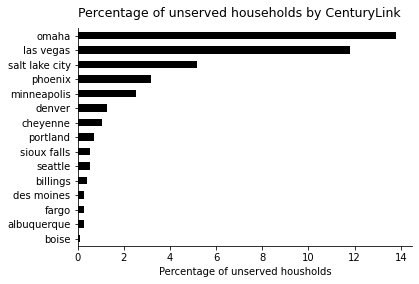

In [8]:
unserved(cl, isp='CenturyLink', height=4)

In [9]:
cl = cl[cl.price != 65]
cl = cl[cl.speed_down != 0]
len(cl)

180067

In [10]:
cl = bucket_and_bin(cl)

In [11]:
# cost per Mbps?
50 / cl.speed_down.describe()

count      0.000278
mean       0.512946
std        0.622787
min      100.000000
25%        3.333333
50%        0.625000
75%        0.250000
max        0.250000
Name: speed_down, dtype: float64

In [12]:
# who has options?
cl[(cl['speed_down'] != cl['fastest_speed_down']) &
   (~cl['fastest_speed_down'].isnull())]['speed_down_bins'].value_counts(normalize=True)

Blazing (≥200)     0.999984
Slow (<25 Mbps)    0.000016
No service         0.000000
Medium (25-99)     0.000000
Fast (100-199)     0.000000
Name: speed_down_bins, dtype: float64

In [13]:
variety = cl.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
homogenous_cities = variety[variety >= .95].index.get_level_values(0)
len(homogenous_cities)

0

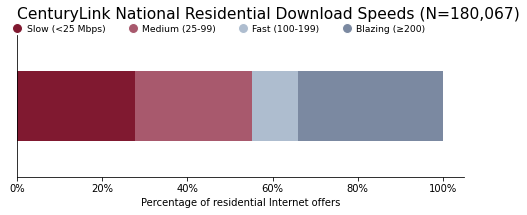

In [14]:
speed_breakdown(cl, isp='CenturyLink')

In [15]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in cl.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = pd.concat([city2speeds,row])
city2speeds.to_csv(fn_speed, index=False)

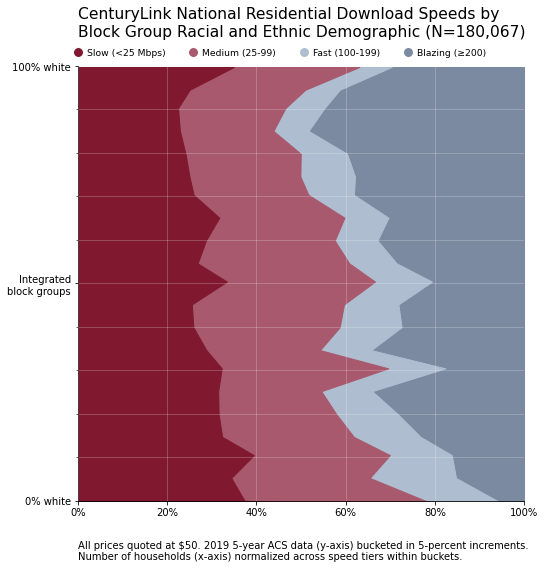

In [16]:
plot_race(cl, isp='CenturyLink', price="$50")

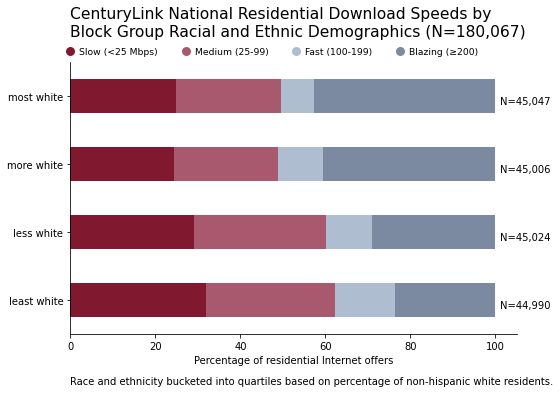

In [17]:
race(cl, isp='CenturyLink')

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


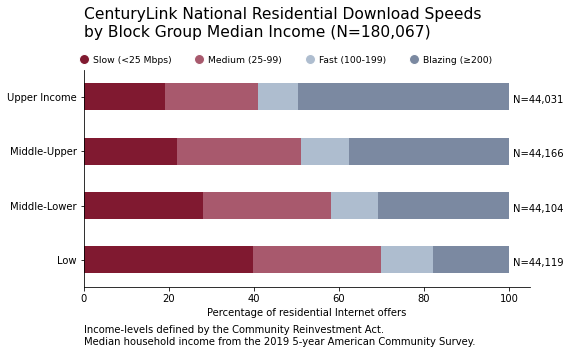

In [18]:
income(cl, isp='CenturyLink')

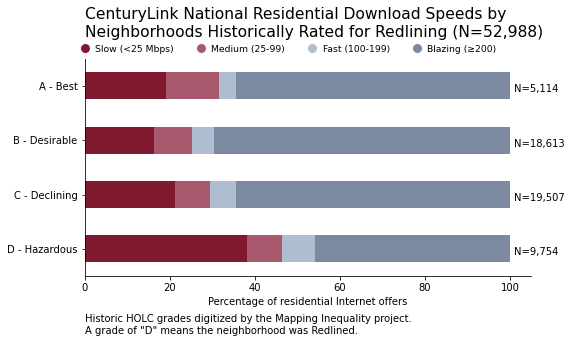

In [19]:
redlining(cl, isp='CenturyLink')

## Each City

albuquerque


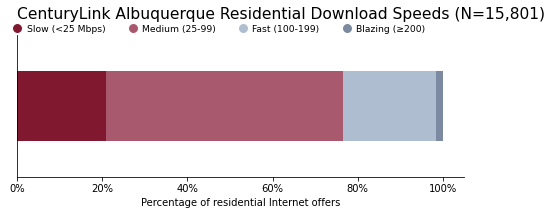

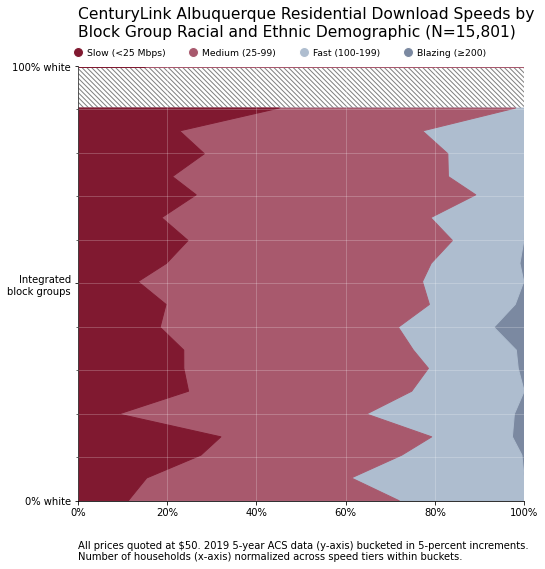

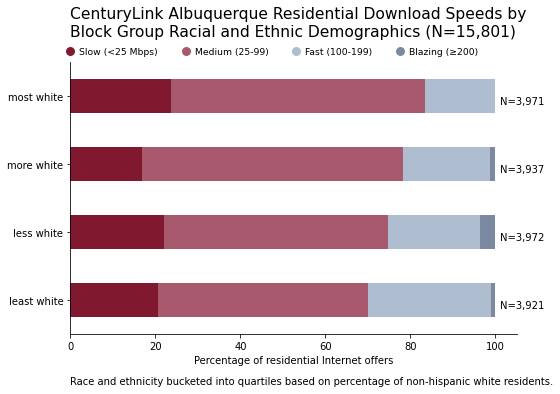

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


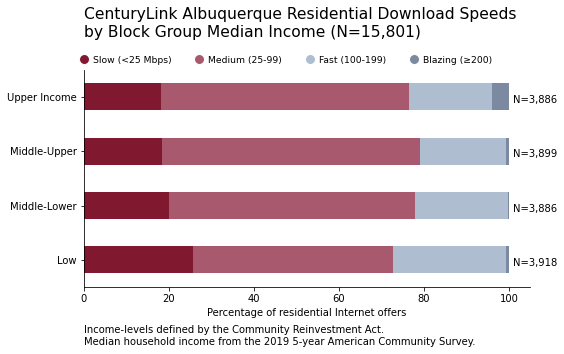

*******************************************************************************
billings


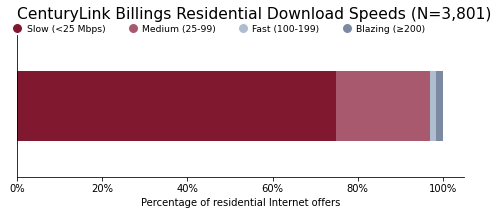

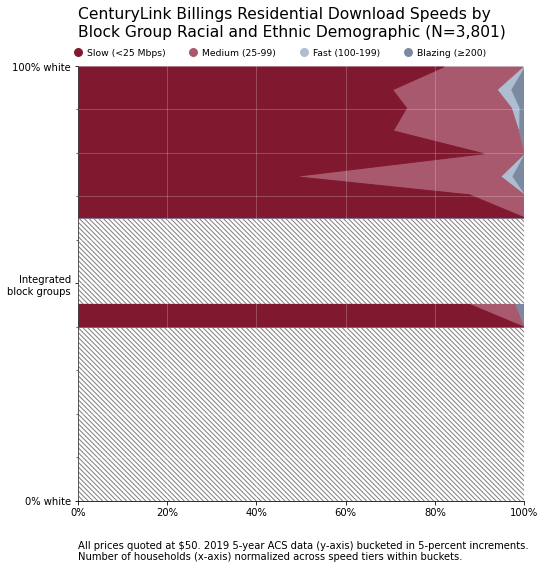

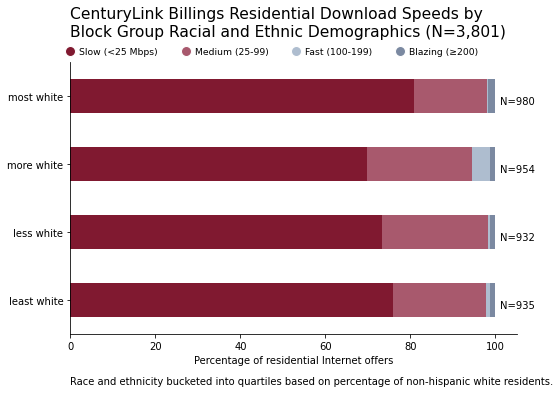

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


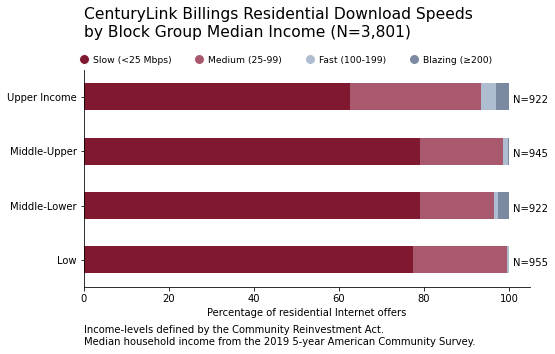

*******************************************************************************
boise


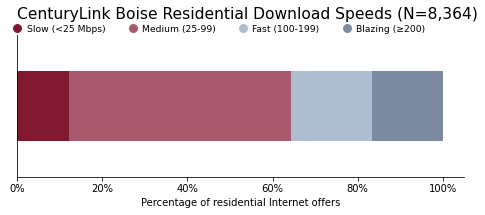

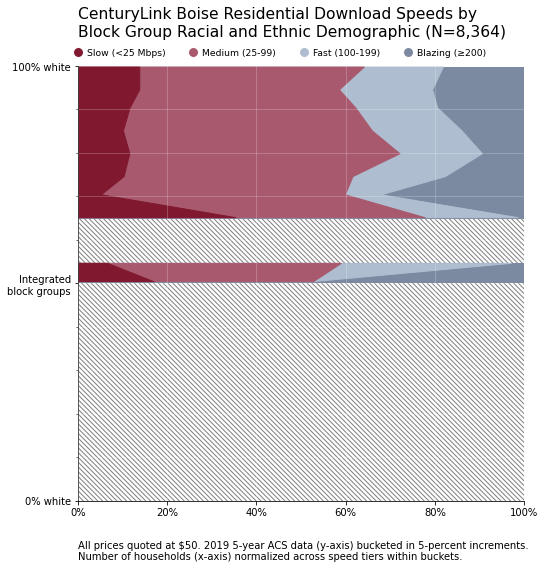

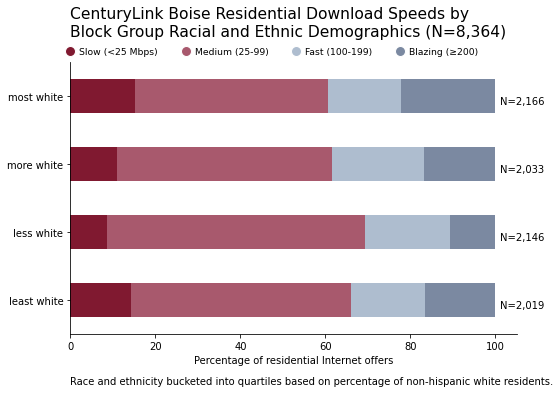

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


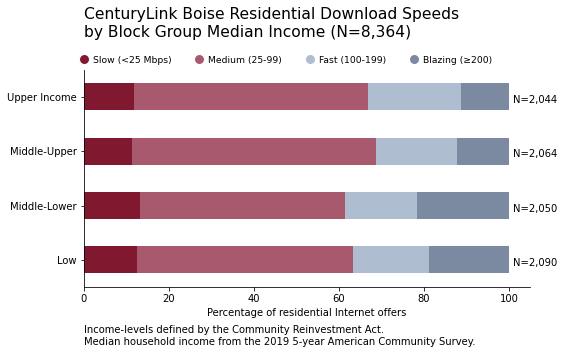

*******************************************************************************
cheyenne


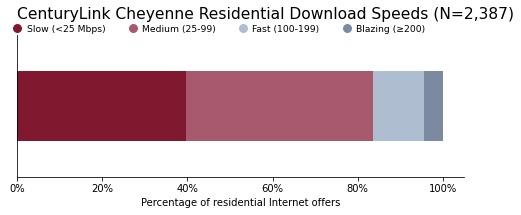

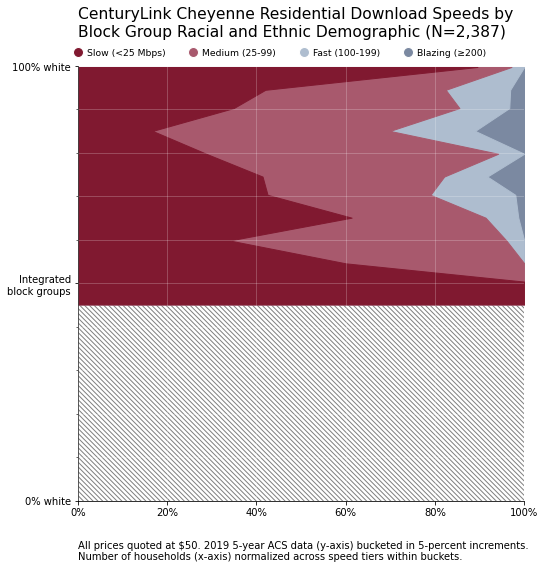

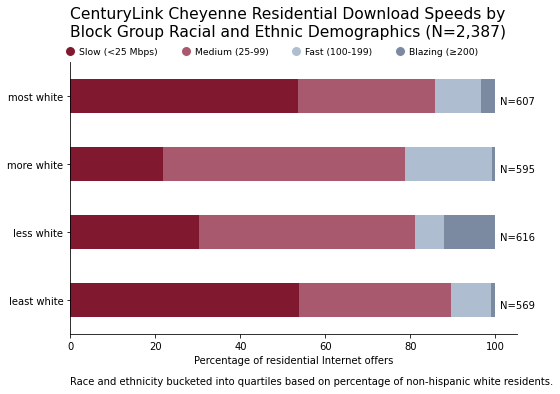

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


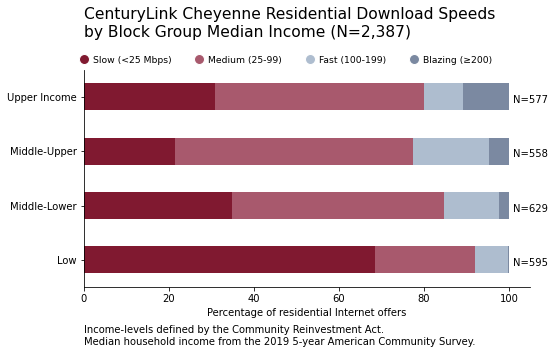

*******************************************************************************
denver


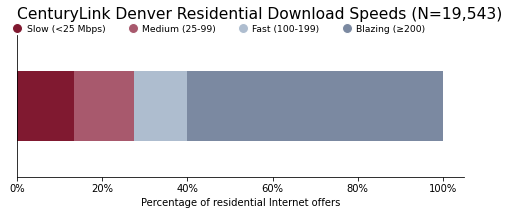

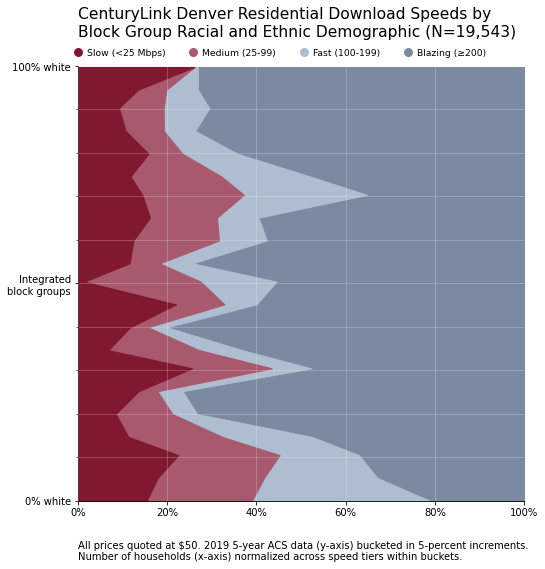

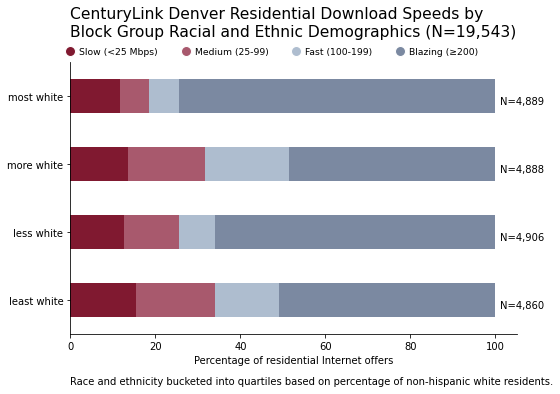

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


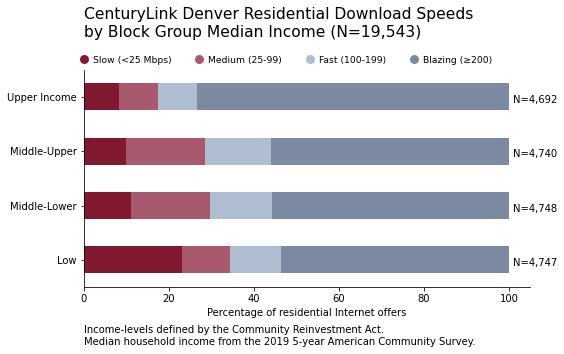

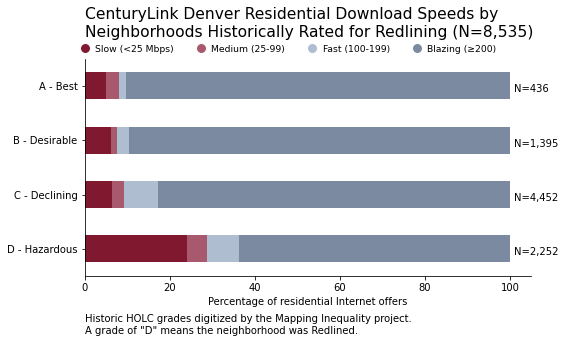

*******************************************************************************
des moines


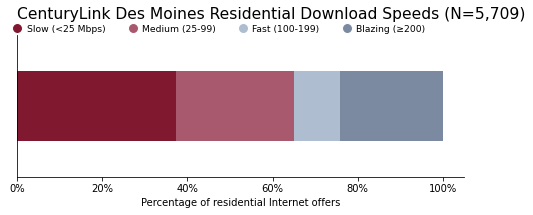

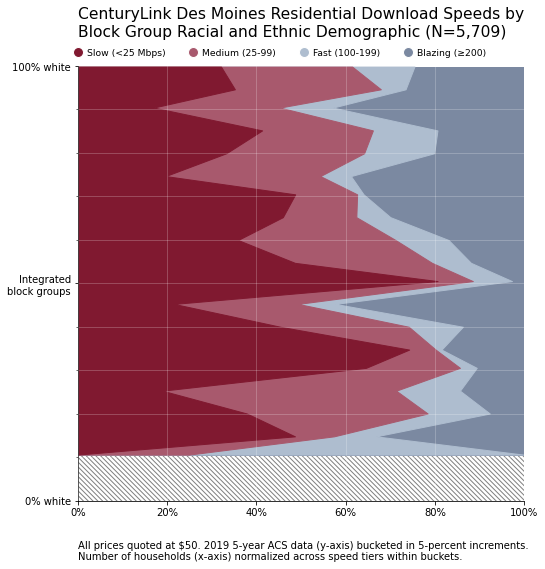

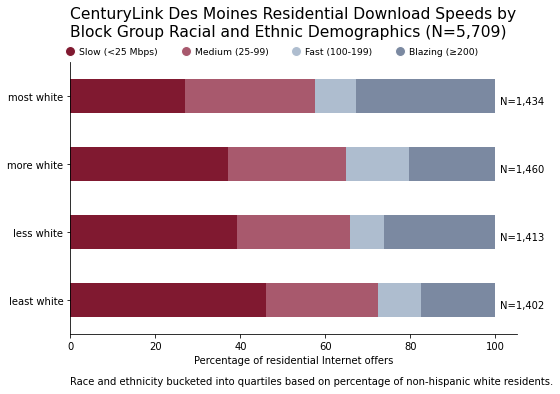

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


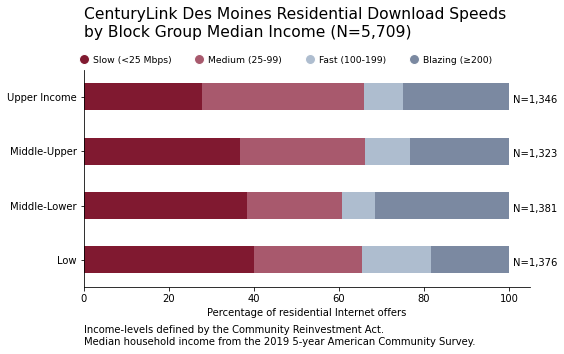

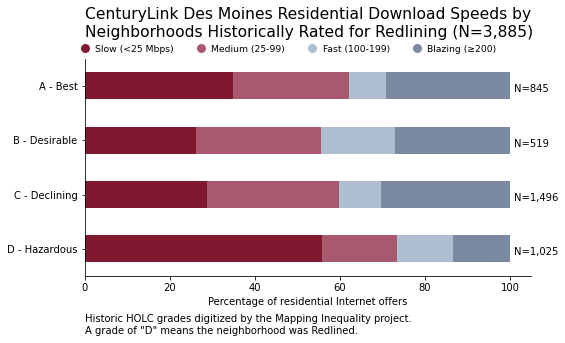

*******************************************************************************
fargo


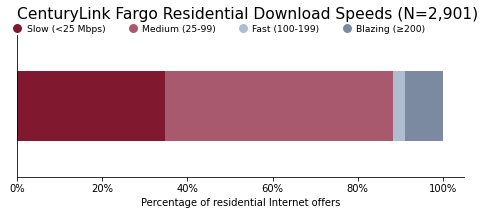

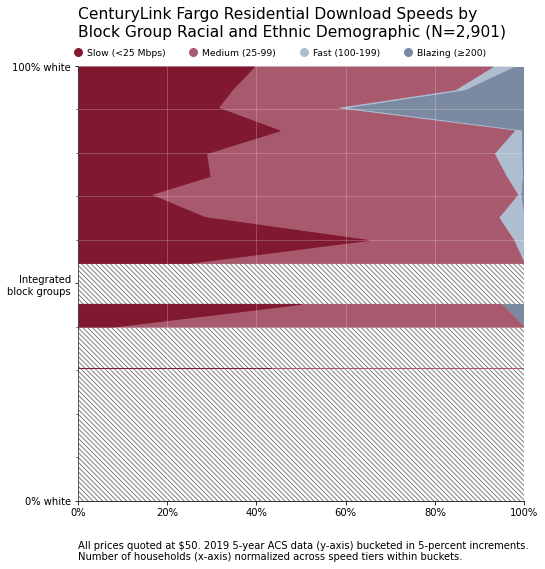

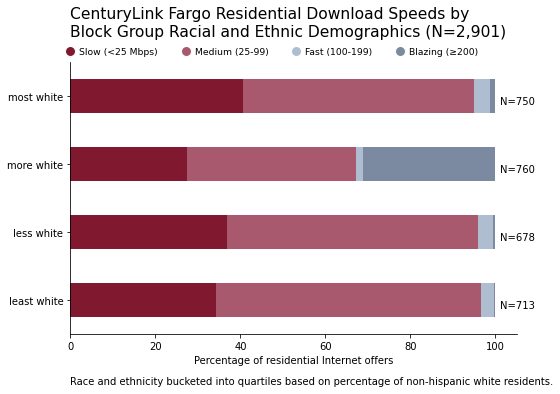

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


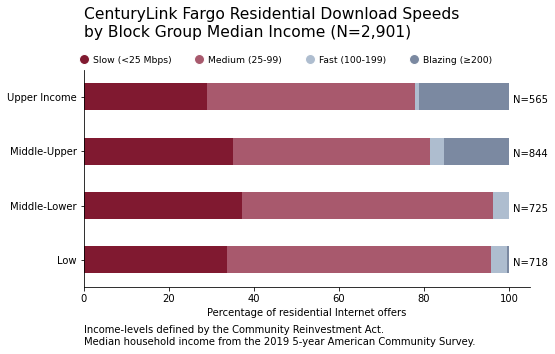

*******************************************************************************
las vegas


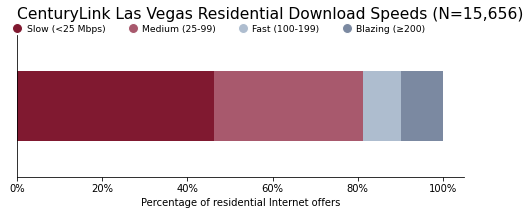

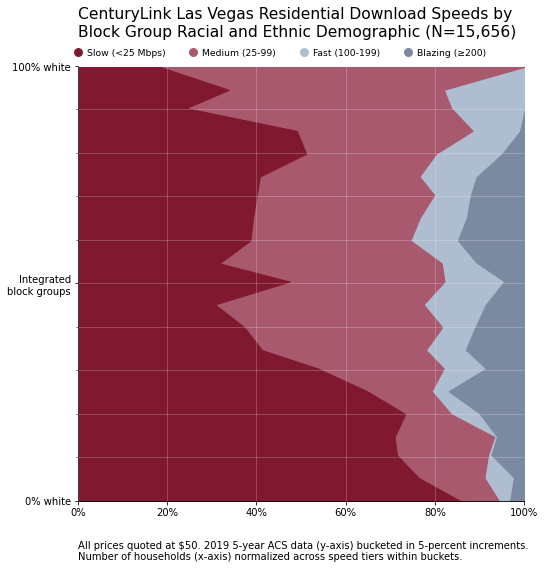

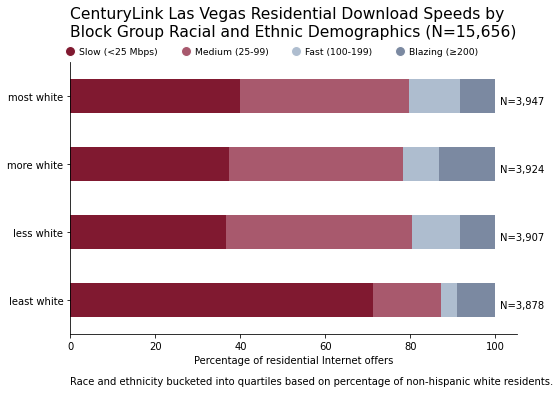

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


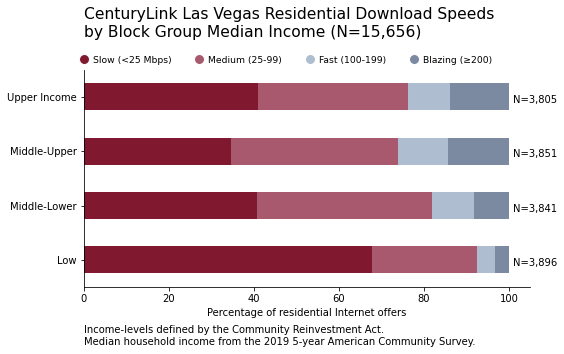

*******************************************************************************
minneapolis


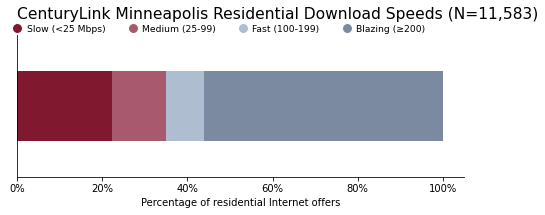

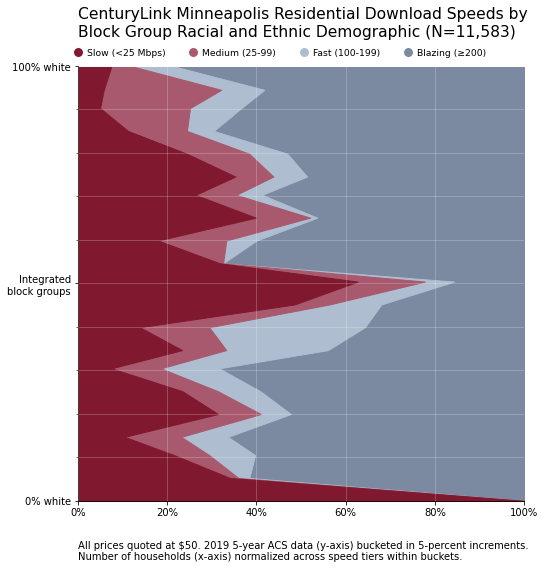

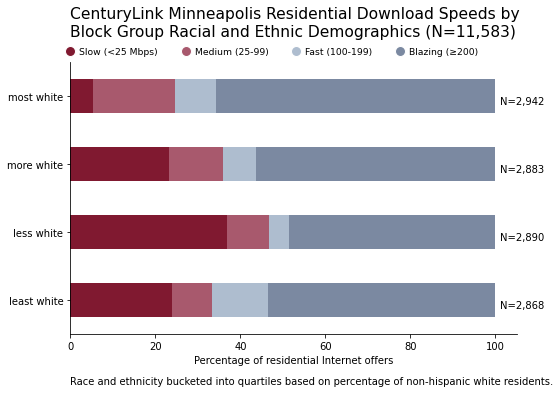

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


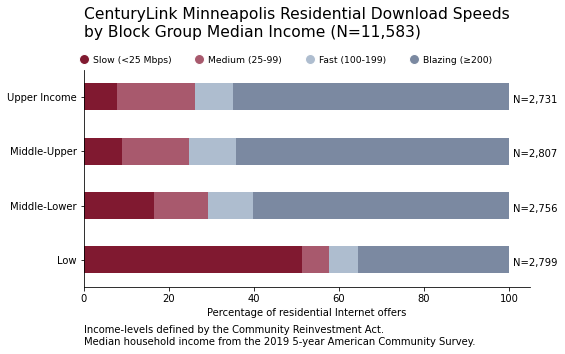

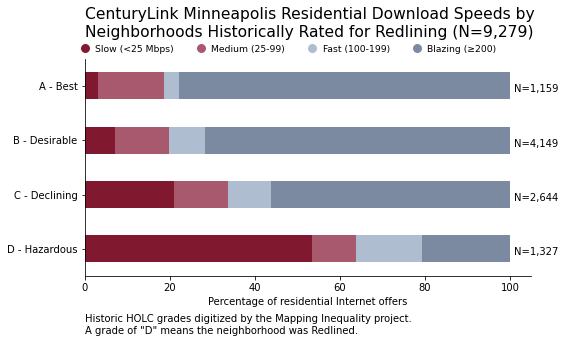

*******************************************************************************
omaha


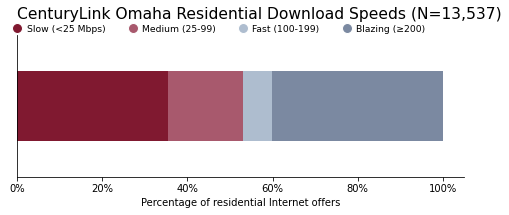

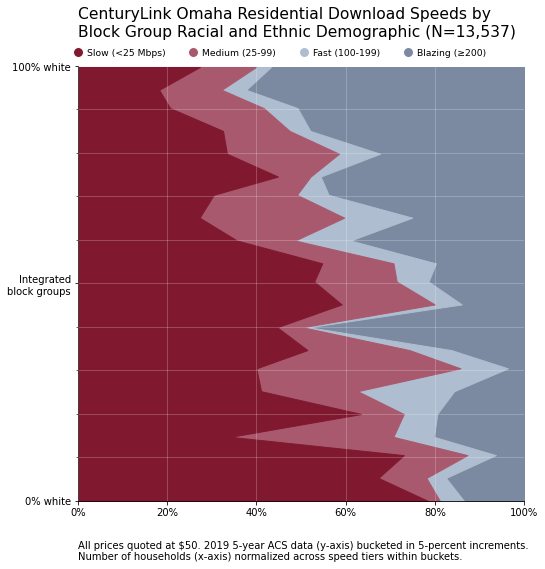

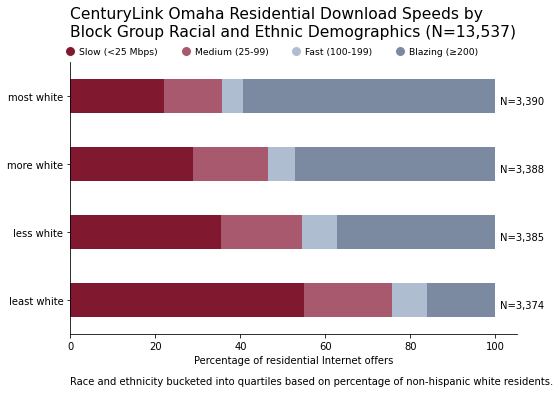

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


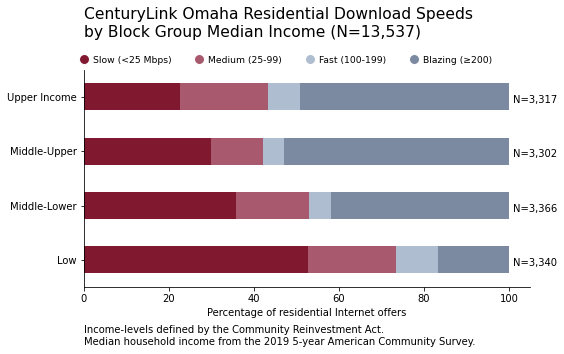

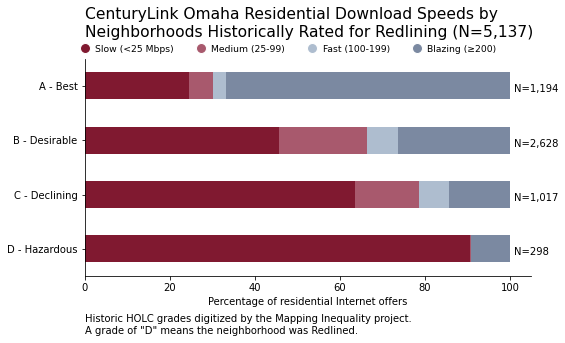

*******************************************************************************
phoenix


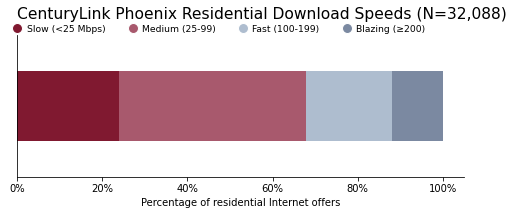

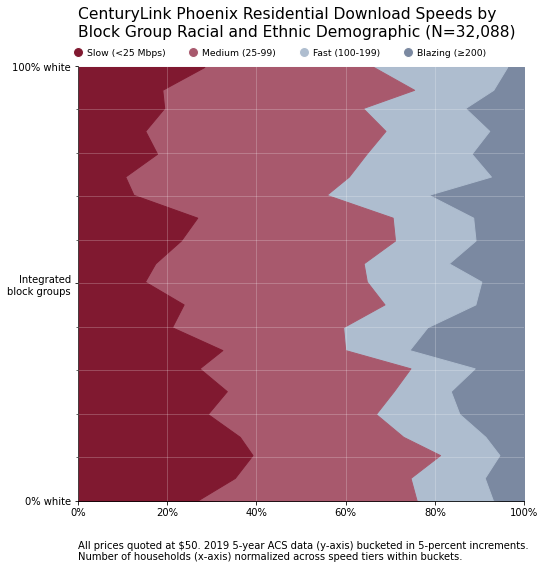

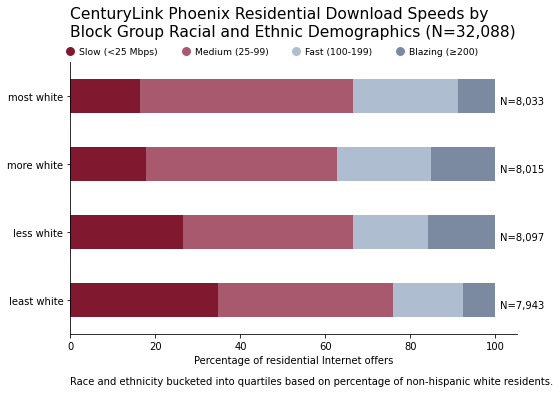

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


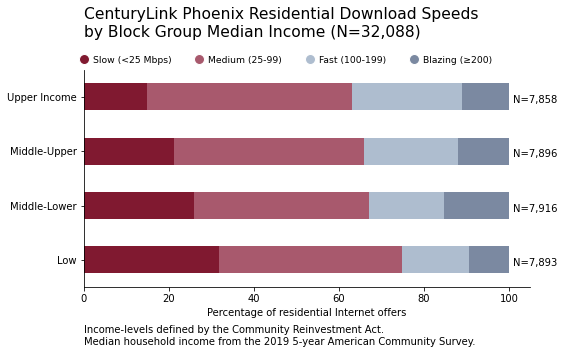

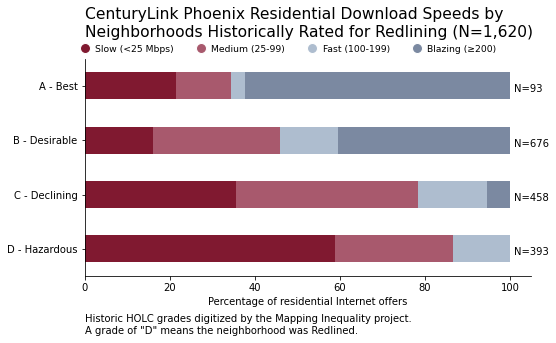

*******************************************************************************
portland


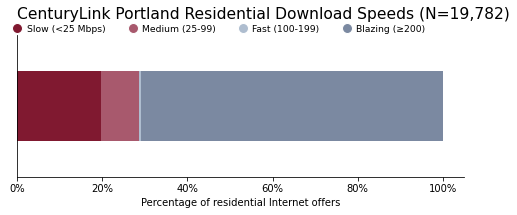

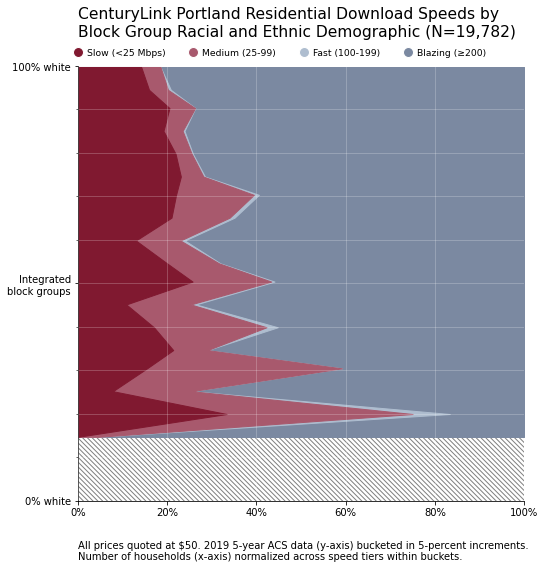

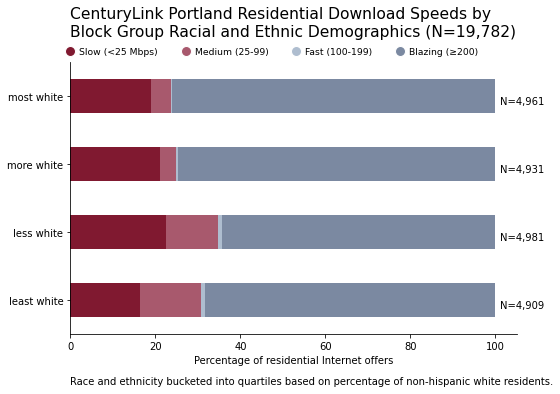

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


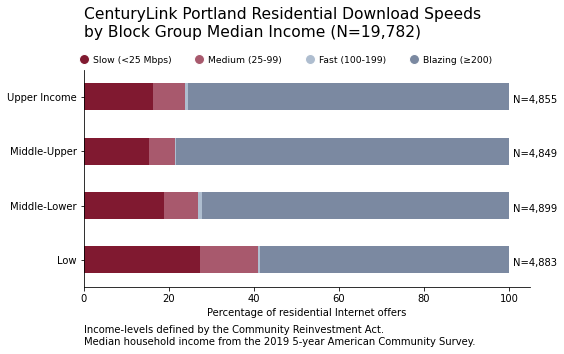

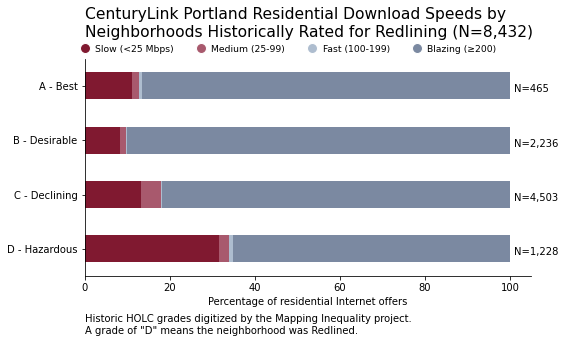

*******************************************************************************
salt lake city


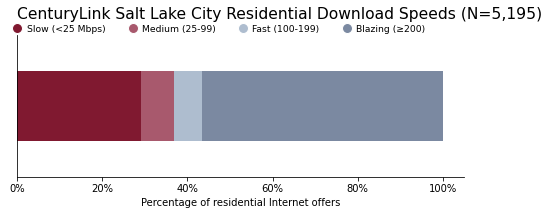

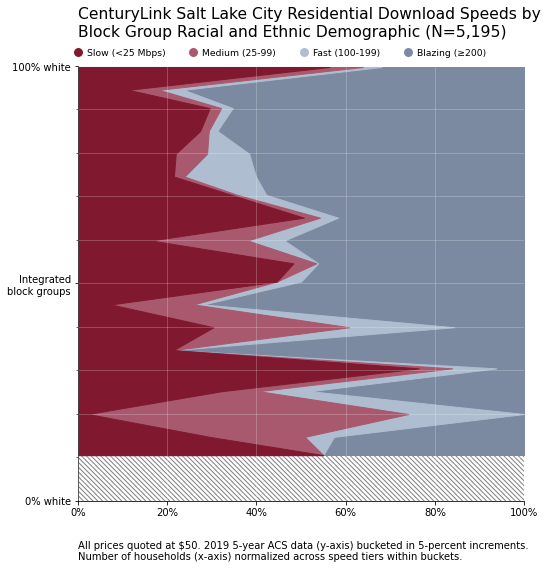

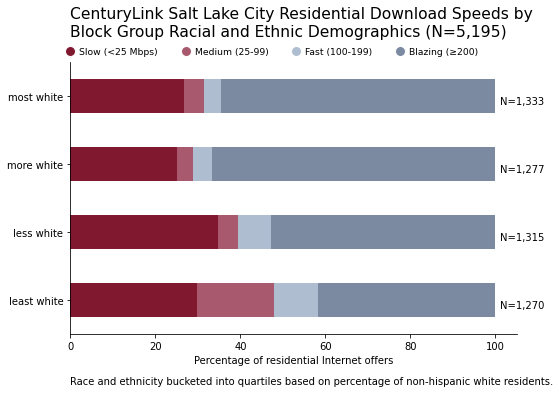

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


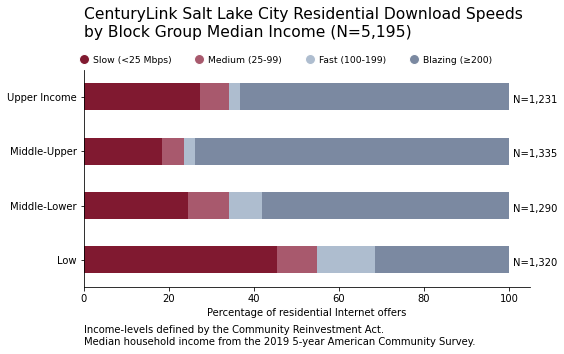

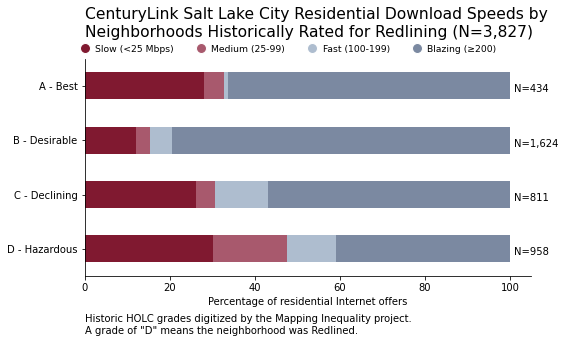

*******************************************************************************
seattle


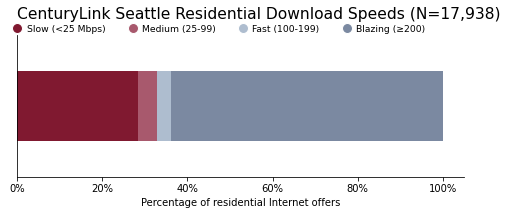

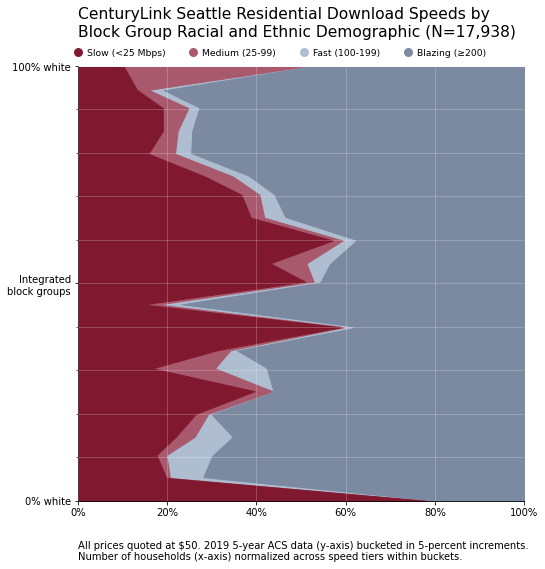

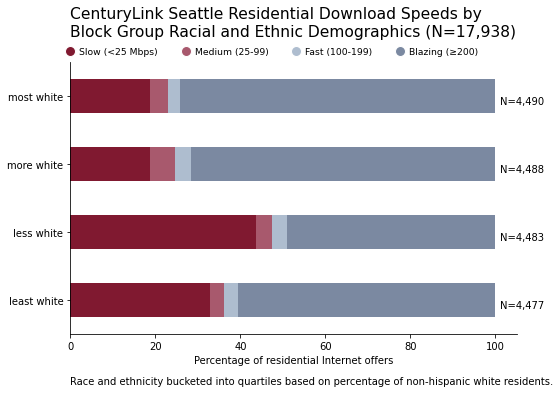

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


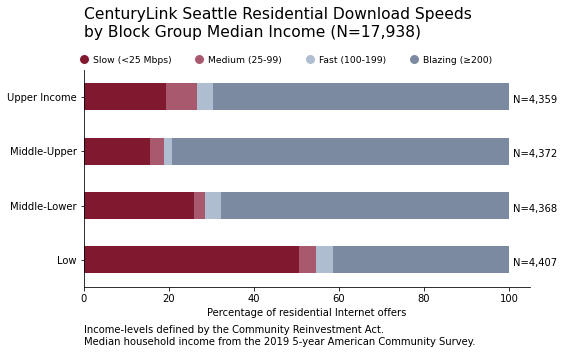

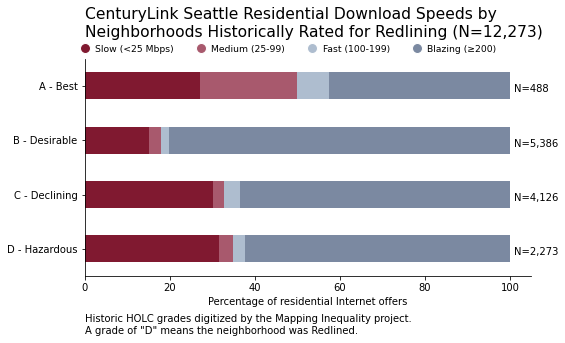

*******************************************************************************
sioux falls


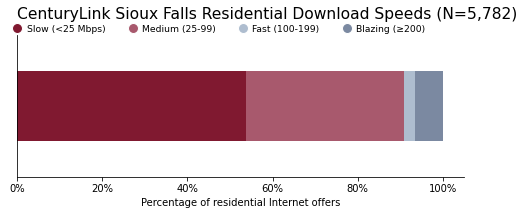

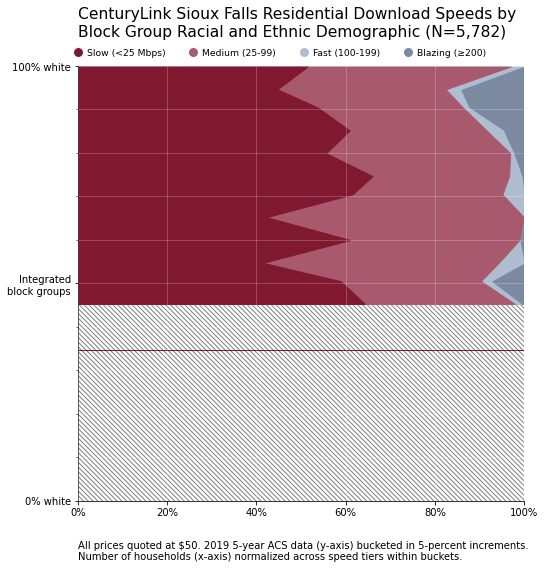

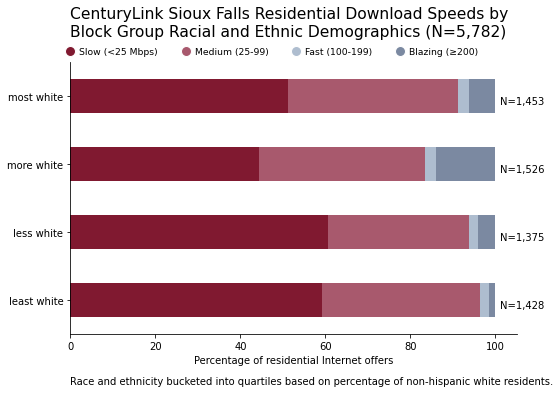

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


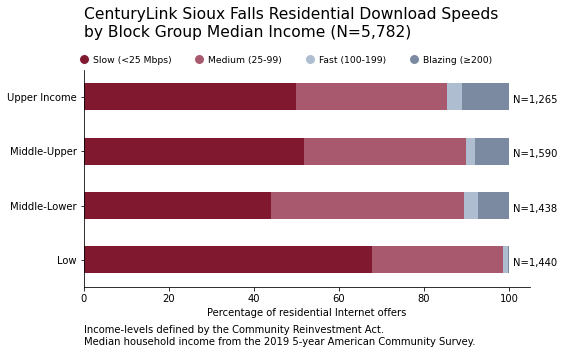

*******************************************************************************


In [20]:
for city, _df in cl.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title(), isp='CenturyLink')
    plot_race(_df, location=city.title(), isp='CenturyLink', price='$50')
    race(_df, location=city.title(), isp='CenturyLink')
    income(_df, location=city.title(), isp='CenturyLink')
    redlining(_df, location=city.title(), isp='CenturyLink')
    print("*" * 79)

## Vegas info for story

In [21]:
# outputs
fn_fig_story_a = '../data/output/figs/story_income_{city}.csv'
fn_fig_story_b = '../data/output/figs/story_race_{city}.csv'

In [22]:
from pandas.api.types import CategoricalDtype
from config import income_labels

In [23]:
vegas = cl[cl.major_city == 'las vegas']

In [24]:
zipcodes =  ['89101', '89110', '89104']

In [25]:
bg = vegas[vegas.address_full.str.contains('|'.join(zipcodes))].block_group.unique()

In [26]:
vegas[vegas.block_group.isin(set(bg))].is_slow.value_counts(normalize=True)

1    0.780248
0    0.219752
Name: is_slow, dtype: float64

In [27]:
vegas.is_slow.value_counts(normalize=True)

0    0.537941
1    0.462059
Name: is_slow, dtype: float64

In [28]:
for city in ['las vegas']:
    df_city = bucket_and_bin(cl[cl.major_city == city])
    df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
         CategoricalDtype(income_labels, ordered=True)
    ).copy(deep=True)

    to_plot = (df_city.groupby('income_level').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_a.format(city=city.replace(' ', '_')))
    to_plot = (df_city.groupby('race_quantile').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_b.format(city=city.replace(' ', '_')))

<ipython-input-28-4544561cc1d9>:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_city.loc[:, 'income_level'] = df_city['income_level'].astype(


In [29]:
full_tracts = ['4.03',
 '5.10',
 '5.13',
 '5.14',
 '5.15',
 '5.16',
 '5.17',
 '5.18',
 '5.19',
 '5.20',
 '5.21',
 '5.22',
 '5.24',
 '5.25',
 '5.26',
 '5.27',
 '5.28',
 '6.00',
 '6.00',
 '7.00',
 '11.00',
 '12.00',
 '13.00',
 '14.01',
 '14.02',
 '22.04',
 '79.00']

In [30]:
number = 1
print(f"{number:02d}")

01


In [31]:
len('32003000403')

11

In [32]:
tracts = []
for tract, block in [_.split('.') for _ in full_tracts]:
    tracts.append(f"32003{int(tract):04}{int(block):02}")
tracts = set(tracts)

In [33]:
vegas[vegas.block_group.apply(lambda x: str(x)[:11]).isin(tracts)].speed_down_bins.value_counts(normalize=True)

Slow (<25 Mbps)    0.829960
Medium (25-99)     0.159630
Blazing (≥200)     0.008097
Fast (100-199)     0.002313
No service         0.000000
Name: speed_down_bins, dtype: float64

In [34]:
vegas[vegas.block_group.apply(lambda x: str(x)[:11]).isin(tracts)].speed_down_bins.value_counts(normalize=True)

Slow (<25 Mbps)    0.829960
Medium (25-99)     0.159630
Blazing (≥200)     0.008097
Fast (100-199)     0.002313
No service         0.000000
Name: speed_down_bins, dtype: float64

In [35]:
partial_tracts = ['5.23', '15.01', '22.01', '22.03']
tracts = list(tracts)
for tract, block in [_.split('.') for _ in partial_tracts]:
    tracts.append(f"32003{int(tract):04}{int(block):02}")
tracts = set(tracts)

In [36]:
vegas[vegas.block_group.apply(lambda x: str(x)[:11]).isin(tracts)].speed_down_bins.value_counts(normalize=True)

Slow (<25 Mbps)    0.809762
Medium (25-99)     0.179700
Blazing (≥200)     0.008319
Fast (100-199)     0.002219
No service         0.000000
Name: speed_down_bins, dtype: float64

In [37]:
slow = cl[cl.speed_down == .5]

In [38]:
slow.major_city.nunique()

15

In [39]:
cl.major_city.nunique()

15

In [40]:
vegas.groupby('income_level').speed_down_bins.value_counts(normalize=True)

income_level  speed_down_bins
Low           Slow (<25 Mbps)    0.673590
              Medium (25-99)     0.251121
              Fast (100-199)     0.045787
              Blazing (≥200)     0.029502
              No service         0.000000
Middle-Lower  Medium (25-99)     0.430433
              Slow (<25 Mbps)    0.384315
              Fast (100-199)     0.102137
              Blazing (≥200)     0.083116
              No service         0.000000
Middle-Upper  Slow (<25 Mbps)    0.372953
              Medium (25-99)     0.366749
              Blazing (≥200)     0.146402
              Fast (100-199)     0.113896
              No service         0.000000
Upper Income  Slow (<25 Mbps)    0.386253
              Medium (25-99)     0.360706
              Blazing (≥200)     0.147202
              Fast (100-199)     0.105839
              No service         0.000000
Name: speed_down_bins, dtype: float64